In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
# import missingno as msno

In [56]:
# load gridtx-dump-AGGREGATED-CLEANED-THRESHOLD-COVERAGE100-NORMALIZED.csv 
df = pd.read_csv('data/gridtx-dump-AGGREGATED-CLEANED-THRESHOLD-COVERAGE100-NORMALIZED.csv')

df_prod = pd.read_csv("data/gridtx-dump-AGGREGATED-CLEANED-THRESHOLD-COVERAGE100-NORMALIZED-PROD.csv")
df_cons = pd.read_csv("data/gridtx-dump-AGGREGATED-CLEANED-THRESHOLD-COVERAGE100-NORMALIZED-CONS.csv")

In [57]:
meter_id = "e882f9a7-f1de-4419-9869-7339be303281"

df_mm_prod = df[(df['type'] == 'production') & (df['meter_id']==meter_id)]
df_mm_cons = df[(df['type'] == 'consumption') & (df['meter_id']==meter_id)]
df_mm_prod.index = pd.to_datetime(df_mm_prod['timeslot'], utc=True)
df_mm_cons.index = pd.to_datetime(df_mm_cons['timeslot'], utc=True)
# Sort index by timeslot
df_mm_prod = df_mm_prod.sort_index()
df_mm_cons = df_mm_cons.sort_index()

In [62]:
print("Total production: ", df_mm_prod["num_kwh"].sum())
print("Total consumption: ", df_mm_cons["num_kwh"].sum())


start_prod = df_mm_prod.index[0]
end_prod = df_mm_prod.index[-1]
start_cons = df_mm_cons.index[0]
end_cons = df_mm_cons.index[-1]

time_delta_seconds_prod =  (end_prod-start_prod).total_seconds()
years_timedelta_prod = time_delta_seconds_prod/(365.25*24*60*60)

time_delta_seconds_cons =  (end_cons-start_cons).total_seconds()
years_timedelta_cons = time_delta_seconds_cons/(365.25*24*60*60)


print("Yearly avg. production: ", df_mm_prod["num_kwh"].sum()/years_timedelta_prod)
print("Yearly avg. consumption: ", df_mm_cons["num_kwh"].sum()/years_timedelta_cons)


print("Percentage", (df_mm_prod["num_kwh"].sum()/years_timedelta_prod)/(df_mm_cons["num_kwh"].sum()/years_timedelta_cons)*100)


Total production:  9783.587
Total consumption:  45332.447
Yearly avg. production:  3922.922131643948
Yearly avg. consumption:  18176.938541853444
Percentage 21.58186386894138


In [63]:
# load grid-metering-point-dump-plus-zipcode-GMAPS-in-gridtx.csv
df_zip = pd.read_csv('data/grid-metering-point-dump-plus-zipcode-GMAPS-in-gridtx.csv')

In [79]:
# Uncommented as the coordinates are sensitive data
# df_zip[df_zip["idgrid_data_table"] == meter_id]

# Most number of values

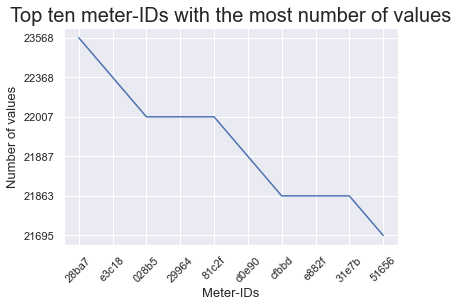

In [67]:
d1 = np.array([df_prod['meter_id'].value_counts(ascending=False).index.tolist(),df_prod['meter_id'].value_counts(ascending=False).tolist()])
sns.set(style="darkgrid")
plt.plot([i[:5] for i in d1[0,0:10]],d1[1,0:10])
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.title('Top ten meter-IDs with the most number of values', size=20)
plt.xlabel('Meter-IDs', size=13)
plt.ylabel('Number of values', size=13)
plt.show()

# Time range considered

In [68]:
maxTime = []
minTime = []
for meter in d1[0,0:10]:
    df_mm_prod = df[(df['type'] == 'production') & (df['meter_id']==meter)]
    maxTime.append(max(df_mm_prod['timeslot']))
    minTime.append(min(df_mm_prod['timeslot']))

d2 = pd.DataFrame({'meter_id': d1[0,0:10], 'min_time':minTime, 'max_time': maxTime})

<function matplotlib.pyplot.show(close=None, block=None)>

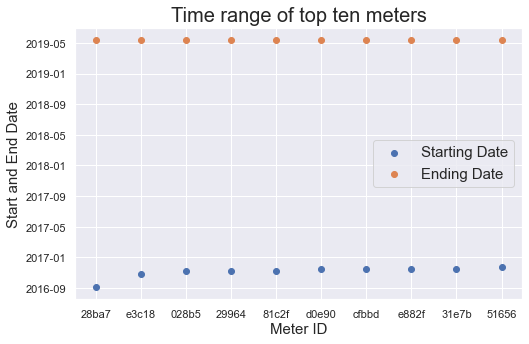

In [69]:
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter([i[:5] for i in d2['meter_id']], pd.to_datetime(d2['min_time']), label='Starting Date')
plt.scatter([i[:5] for i in d2['meter_id']], pd.to_datetime(d2['max_time']), label='Ending Date')
plt.legend(fontsize=15)
plt.title('Time range of top ten meters', fontsize=20)
plt.xlabel('Meter ID', size=15)
plt.ylabel('Start and End Date', size=15)
plt.show

# Summary Stats

In [73]:
df_mm_prod = df[(df['type'] == 'production') & (df['meter_id']==meter_id)]
df_mm_cons = df[(df['type'] == 'consumption') & (df['meter_id']==meter_id)]
df_mm_prod.index = pd.to_datetime(df_mm_prod['timeslot'], utc=True)
df_mm_cons.index = pd.to_datetime(df_mm_cons['timeslot'], utc=True)
df_mm_prod = df_mm_prod.filter(['num_kwh'])
df_mm_cons = df_mm_cons.filter(['num_kwh'])

In [74]:
df_mm_prod['month'] = df_mm_prod.index.month
df_mm_prod['hour'] = df_mm_prod.index.hour
df_mm_cons['month'] = df_mm_cons.index.month
df_mm_cons['hour'] = df_mm_cons.index.hour

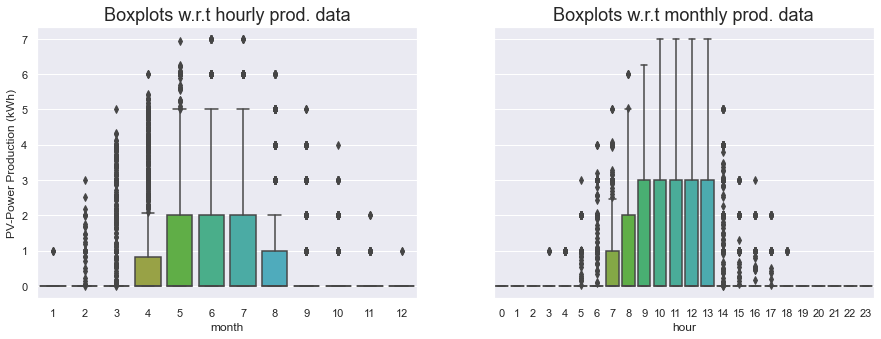

In [77]:
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (15,5)
fig, axes = plt.subplots(1,2, sharey = True)

#create chart in each subplot
sns.boxplot(x='month', y='num_kwh', data=df_mm_prod, ax=axes[0])
sns.boxplot(x='hour', y='num_kwh', data=df_mm_prod, ax=axes[1])
axes[0].set_title('Boxplots w.r.t hourly prod. data', fontsize=18)
axes[1].set_title('Boxplots w.r.t monthly prod. data', fontsize=18)
axes[0].set_ylabel('PV-Power Production (kWh)', size=12) 
axes[1].set_ylabel('', size=12) 

plt.savefig("figures/data/prod_boxplots.png")

plt.show()

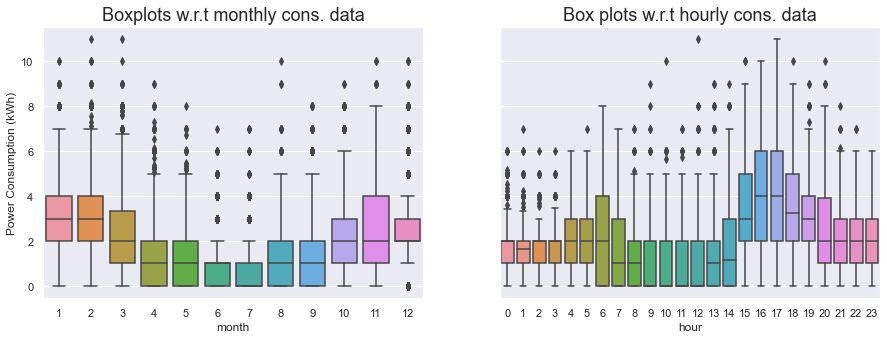

In [78]:
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (15,5)
fig, axes = plt.subplots(1,2, sharey = True)

#create chart in each subplot
sns.boxplot(x='month', y='num_kwh', data=df_mm_cons, ax=axes[0])
sns.boxplot(x='hour', y='num_kwh', data=df_mm_cons, ax=axes[1])
axes[0].set_title('Boxplots w.r.t monthly cons. data', fontsize=18)
axes[1].set_title('Box plots w.r.t hourly cons. data', fontsize=18)
axes[0].set_ylabel('Power Consumption (kWh)', size=12) 
axes[1].set_ylabel('', size=12) 

plt.savefig("figures/data/cons_boxplots.png")

plt.show()

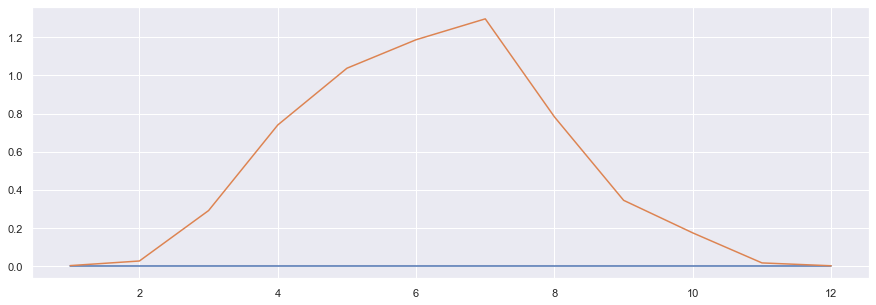

In [19]:
plt.plot(df_mm_prod.groupby('month')['num_kwh'].median(), label='Median')
plt.plot(df_mm_prod.groupby('month')['num_kwh'].mean(), label='Mean')
